In [56]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import sys

sys.path.append("../rsc") # Adds pyLi directory to python modules path.
# import lithium as li
# import other as ot


from parameter_space import Parameter_space
from helper import progress_bar



%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


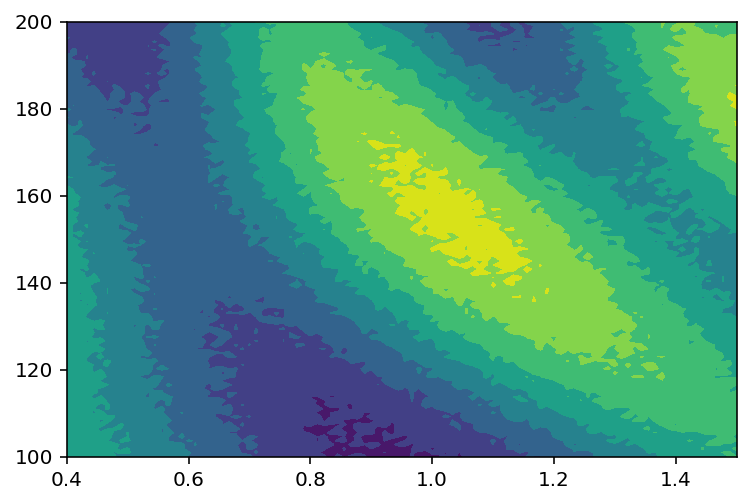

In [34]:
def black(x, y):
    x = np.array(x)
    x = x*25
    s = np.sin(x*y*0.002)
    g = np.exp(-(x-50)**2/2000 -(y-160)**2/2000)*2
    return s+g+np.random.random(x.shape)/3

xx, yy = np.meshgrid(np.linspace(0.4, 1.5, 100), np.linspace(100, 200, 110))
zz = black(xx, yy)

plt.contourf(xx, yy, zz)

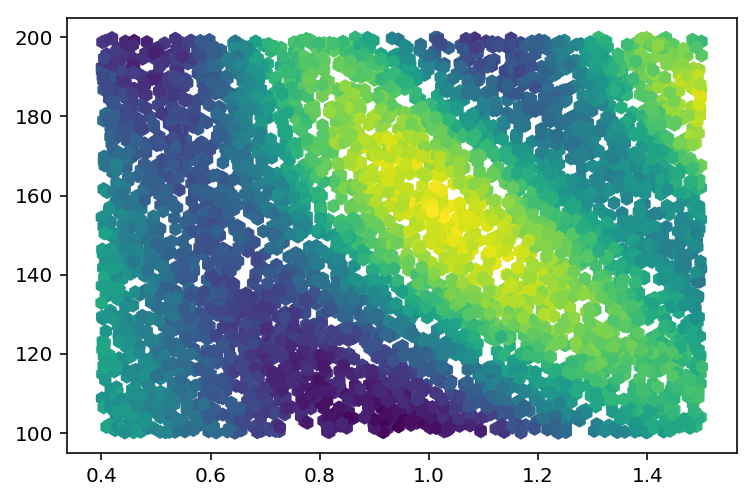

In [45]:
ps = Parameter_space(bounds={
    'x' : (0.4, 1.5, 'linear'),
    'y' : (100, 200, 'linear')
})


xyz = np.ones([3, 5000])

for index in range(xyz.shape[1]):
    point = ps.get_random_next()
    target = black(**point)
    
    xyz[..., index] = (point['x'], point['y'], target)


plt.scatter(xyz[0,...], xyz[1,...], c=xyz[2,...], marker='h')

In [105]:
ps = Parameter_space(bounds={
    'x' : (0.4, 1.5, 'linear'),
    'y' : (100, 200, 'linear')
})
ps.bayesopt(black, kappa=2.5)


## random initialization
xyz0 = np.ones([3, 50])
for index in range(xyz0.shape[1]):
    point = ps.get_random_next()
    target = black(**point)
    xyz0[..., index] = (point['x'], point['y'], target)
    
    ps.register_point(point, target)
    

## bayes optimization
xyz = np.ones([3, 50])
for index in range(xyz.shape[1]):
    point = ps.get_bayes_next()
    target = black(**point)
    
    xyz[..., index] = (point['x'], point['y'], target)
    
    ps.register_point(point, target)
    progress_bar(index, xyz.shape[1])


[##################################################] 100.0%

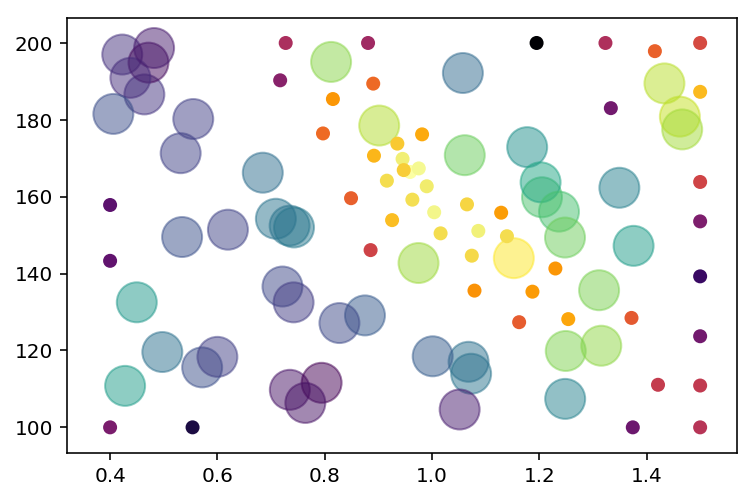

In [107]:
plt.scatter(xyz0[0,...], xyz0[1,...], c =xyz0[2,...], marker='o', cmap='viridis', s=400, alpha=0.5)
plt.scatter(xyz[0,...], xyz[1,...], c=xyz[2,...], marker='o', cmap='inferno')

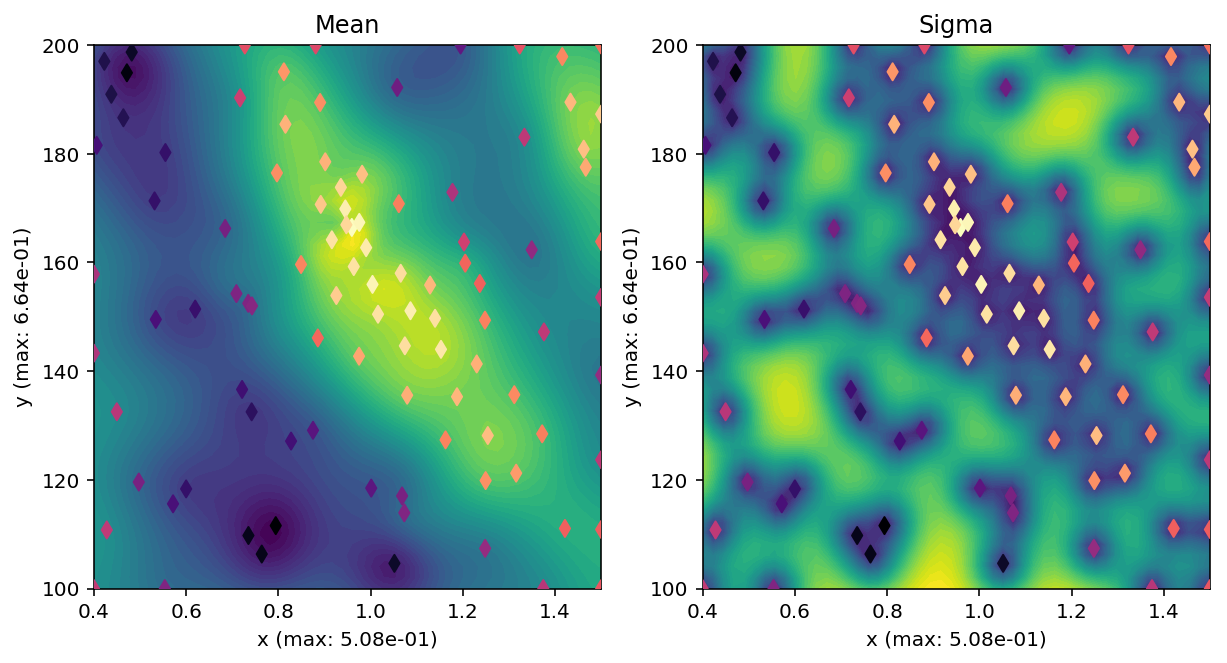

In [108]:
ps.plot_optimizer()

In [100]:
list(ps.bounds.keys())

['x']